# Uvod u biblioteku Pandas

**Pandas** je Python biblioteka koja je namenjena radu sa tabelarnim podacima. Na [ovom](https://pandas.pydata.org/) linku se nalazi zvanična stranica, a [ovde](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) se može pronaći koristan tutorijal.

Osnovne strukture podataka koje koristi biblioteka Pandas su:

- jednodimenziona struktura **Series**
- dvodimenziona struktura **DataFrame**

U pitanju su strukture podataka kojima se predstavljaju strukturni podaci koji imaju obeležja po jednoj, odnosno dve dimenzije.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Series objekti

**Series** je struktura podataka koja odgovara jednodimenzionom nizu sa pridruženim obeležjima (indeksima).

In [2]:
points = pd.Series([(1, 3), (2, 4), (6, 4), (5, 7)])
print(points)

0    (1, 3)
1    (2, 4)
2    (6, 4)
3    (5, 7)
dtype: object


In [3]:
print('Vrednosti: ', points.values)

Vrednosti:  [(1, 3) (2, 4) (6, 4) (5, 7)]


In [4]:
print('Indeksi: ', points.index)

Indeksi:  RangeIndex(start=0, stop=4, step=1)


Indeks objekta Series je podrazumevano sekvenca celobrojnih vrednosti. U opštem slučaju se parametrom `index` prilikom konstrukcije serije može eksplicitno zadati index.

In [5]:
points = pd.Series([(1, 3), (2, 4), (6, 4), (5, 7)], index=['A', 'B', 'C', 'D'])
print(points)

A    (1, 3)
B    (2, 4)
C    (6, 4)
D    (5, 7)
dtype: object


In [6]:
print('Indeksi: ', points.index)

Indeksi:  Index(['A', 'B', 'C', 'D'], dtype='object')


Elementi serije i njihovi indeksi se mogu zadati i u formi rečnika. 

In [7]:
points = pd.Series({'A' : (1, 3), 'B' : (2, 4), 'C' : (6, 4), 'D' : (5, 7)})
print(points)

A    (1, 3)
B    (2, 4)
C    (6, 4)
D    (5, 7)
dtype: object


Korišćenjem funkcije `reindex` se može izvršiti preraspodela elemenata serije.

In [8]:
points.reindex(index=['B', 'D', 'A', 'C'])

B    (2, 4)
D    (5, 7)
A    (1, 3)
C    (6, 4)
dtype: object

## Indeksiranje i izdvajanje elemenata (eng. slicing)

Postoji više načina za pristup elementima objekta Series:

1) Objekat Series ima kao atribute svaku od vrednosti indeksa elemenata, tako da se pojedinačnim elementima može pristupiti na taj način.

2) Nad objektima Series se može primeniti operator indeksiranja \[\] koji očekuje vrednosti njihovog indeksa ili pozicije.

In [9]:
print(points.C)

(6, 4)


In [10]:
print(points['C'])

(6, 4)


In [11]:
print(points[2])

(6, 4)


In [12]:
print(points[['B', 'C']])

B    (2, 4)
C    (6, 4)
dtype: object


In [13]:
print(points[::2])

A    (1, 3)
C    (6, 4)
dtype: object


# DataFrame objekti

**DataFrame** je struktura podataka koja odgovara tabeli sa pridruženim obeležjima redovima i kolonama. **Svaka kolona i svaka vrsta objekta DataFrame je jedan Series objekat.**

Ukoliko se ne učitavaju iz datoteke, podaci se u strukturu DataFrame smeštaju iz mape ili matrice.

In [14]:
data = pd.DataFrame({
    'name' : ['A', 'B', 'C', 'D'],
    'x_value' : [1, 2, 6, 5],
    'y_value' : [3, 4, 4, 7]
})

In [15]:
data              #lepse se ispisuje nego sa print(data)

,name,x_value,y_value
0,A,1,3
1,B,2,4
2,C,6,4
3,D,5,7


In [16]:
data = pd.DataFrame([['A', 1, 3], ['B', 2, 4], ['C', 6, 4], ['D', 5, 7]], columns=['name', 'x_value', 'y_value'])

In [17]:
data

,name,x_value,y_value
0,A,1,3
1,B,2,4
2,C,6,4
3,D,5,7


In [18]:
print('Vrednosti:\n', data.values)

Vrednosti:
 [['A' 1 3]
 ['B' 2 4]
 ['C' 6 4]
 ['D' 5 7]]


In [19]:
print('Indeksi redova: ', data.index)           

Indeksi redova:  RangeIndex(start=0, stop=4, step=1)


Osim atributa <code>values</code> i <code>index</code> koje imaju Series objekti, DataFrame objekti imaju i atribut <code>columns</code>.

In [20]:
print('Indeksi kolona: ', data.columns)

Indeksi kolona:  Index(['name', 'x_value', 'y_value'], dtype='object')


Indeks redova DataFrame objekta ne mora biti samo sekvenca celobrojnih vrednosti, to je samo podrazumevano ponasanje kada pri konstrukciji DataFrame-a nije zadat indeks.

Postavljanje neke od kolona za indeks redova

In [21]:
data.set_index('name', inplace=True)      #II nacin: data = data.set_index('name')
data

,x_value,y_value
name,,
A,1,3
B,2,4
C,6,4
D,5,7


Eksplicitno zadavanje indeksa

In [22]:
data = pd.DataFrame([[1, 3], [2, 4], [6, 4], [5, 7]], columns=['x_value', 'y_value'], index=['A', 'B', 'C', 'D'])
data

,x_value,y_value
A,1,3
B,2,4
C,6,4
D,5,7


## Indeksiranje i izdvajanje elemenata (eng. slicing)

Postoji vise nacina za pristup elementima DataFrame objekta:

1) DataFrame objekat ima kao atribute svaku od vrednosti indeksa kolona (naziva kolona), tako da se kolonama moze direktno pristupiti na taj nacin.

2) Nad DataFrame objektima se moze primeniti operator indeksiranja \[\] (!= slicing operator) za pristup kolonama zadavanjem vrednosti njihovog indeksa kolona (naziva kolona).

3) DataFrame objekat ima atribute <code>loc</code> i <code>iloc</code> - tzv. objekate indeksere (~iterator) koji se koriste za pristup pojedinacnim elementima i izdvajanje delova DataFrame objekta.

- <code>loc</code> je **label-based** indekser, sto znaci da se pomocu njega vrsi indeksiranje zadavanjem labela (obelezja, indeksa) redova i kolona 
- <code>iloc</code> je **integer position-based**, sto znaci da se pomocu njega vrsi indeksiranje zadavanjem pozicija redova i kolona (pozicije se broje pocev od 0) 

4) Pristup pojedinacnim elementima se takodje moze izvrsiti svodjenjem na baratanje sa Series objektima - tako sto se na nacin (1) ili (2) pristupi odgovarajucoj koloni, a zatim trazenom elementu te kolone.

In [23]:
print(type(data.loc))

<class 'pandas.core.indexing._LocIndexer'>


In [24]:
print(type(data.iloc))

<class 'pandas.core.indexing._iLocIndexer'>


### Razliciti nacini za pristup pojedinacnim elementima

In [25]:
print(data.loc['A', 'x_value'])

1


In [26]:
print(data.iloc[0, 0])

1


In [27]:
print(data['x_value']['A'])

1


### Razliciti nacini za izdvajanje pojedinacnih kolona

In [28]:
print(data.x_value)

A    1
B    2
C    6
D    5
Name: x_value, dtype: int64


In [29]:
print(data['x_value'])

A    1
B    2
C    6
D    5
Name: x_value, dtype: int64


In [30]:
print(data.iloc[:, 0])

A    1
B    2
C    6
D    5
Name: x_value, dtype: int64


In [31]:
print(data.loc[:, 'x_value'])

A    1
B    2
C    6
D    5
Name: x_value, dtype: int64


### Razliciti nacini za izdvajanje pojedinacnih redova

In [32]:
print(data.iloc[0, :]) 

x_value    1
y_value    3
Name: A, dtype: int64


In [33]:
print(data.iloc[0])

x_value    1
y_value    3
Name: A, dtype: int64


In [34]:
print(data.loc['A', :])

x_value    1
y_value    3
Name: A, dtype: int64


In [35]:
print(data.loc['A'])

x_value    1
y_value    3
Name: A, dtype: int64


### Izdvajanje elemenata (razno)

Izdvajanje prvih nekoliko redova (preview)

In [36]:
data.head(2)

,x_value,y_value
A,1,3
B,2,4


Poslednjih nekoliko redova

In [37]:
data.tail(2)

,x_value,y_value
C,6,4
D,5,7


Izdvajanje nekih kolona zadatih listom

In [38]:
data[['x_value', 'y_value']]

,x_value,y_value
A,1,3
B,2,4
C,6,4
D,5,7


Izdvajanje nekih redova zadatih pozicijama

In [39]:
data.iloc[::2]

,x_value,y_value
A,1,3
C,6,4


Izdvajanje elemenata koji ispunjavaju neki uslov

In [40]:
data[data.x_value % 2 == 0]

,x_value,y_value
B,2,4
C,6,4


**NAPOMENA:** primenom aritmetickih, logickih i relacionih operatora nad Pandas objektom dobija se novi Pandas objekat sa izvrsenom odgovarajucom operacijom se po elementima, uz ocuvanje indeksa u rezultujucem Pandas objektu!

In [41]:
data.x_value % 2 == 0

A    False
B     True
C     True
D    False
Name: x_value, dtype: bool

## Transformacije nad objektom DataFrame

Većina funkcija za transformacije nad objektom DataFrame ima argument <code>axis</code> kojim se zadaje osa po kojoj će transformacija biti izvršena. DataFrame objekti imaju dve ose - **"osu 0"** koja predstavlja redove i **"osu 1"** koja predstavlja kolone. Za većinu funkcija podrazumevana vrednost argumenta <code>axis</code> je <code>0</code>.

<img src="assets/dataframe_axis.png" width="250" align=left>

Preraspodela redova zadavanjem redosleda njihovih indeksa:

In [42]:
data.reindex(['B', 'D', 'A', 'C'], axis=0)       

,x_value,y_value
B,2,4
D,5,7
A,1,3
C,6,4


Preraspodela kolona zadavanjem redosleda njihovih indeksa:

In [43]:
data.reindex(['y_value', 'x_value'], axis=1)

,y_value,x_value
A,3,1
B,4,2
C,4,6
D,7,5


Vrednosti u objektu DataFrame je moguće sortirati po indeksu redova ili kolona.

Sortiranje po indeksu vrsta:

In [44]:
data.sort_index(ascending=False)          

,x_value,y_value
D,5,7
C,6,4
B,2,4
A,1,3


Sortiranje po vrednostima elemenata u specifičnoj koloni (ekvivalentno bi se moglo postići za redove):

In [45]:
data.sort_values(by='x_value')            

,x_value,y_value
A,1,3
B,2,4
D,5,7
C,6,4


DataFrame strukturu je moguće i transponovati.

In [46]:
data.T

,A,B,C,D
x_value,1,2,6,5
y_value,3,4,4,7


Elemente sadržane u objektu DataFrame, ukoliko to ima smisla, moguće je izvdojiti u višedimenzioni niz biblioteke `numpy`. U te svrhe se koristi funkcija `to_numpy`.

In [47]:
data.to_numpy()

array([[1, 3],
       [2, 4],
       [6, 4],
       [5, 7]])

Strukture DataFrame je moguće proširivati dodavanjem novih redova ili kolona.

Dodavanje novih kolona:

In [48]:
data['color'] = ['blue', 'red', 'blue', 'blue']
data

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue


Dodavanje novih redova:

In [49]:
data_to_append = pd.DataFrame([[0, 1, 'red']],
                              columns=['x_value', 'y_value', 'color'],
                              index=['E'])
data = data.append(data_to_append)
data

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue
E,0,1,red


**NAPOMENA**: metod <code>append()</code> zapravo vrsi konkatenaciju dva DataFrame objekta po redovima!

## Spajanje DataFrame objekata

Postoji nakoliko funkcija/metoda koje se mogu koristiti za spajanje DataFrame objekata na razlicite nacine:

- <code>append()</code> - vrsi dodavanje redova jednog (ili vise) DataFrame-a drugom DataFrame-u

- <code>concat()</code> - vrsi konkatenaciju (spajanje) Pandas objekata duz odredjene ose (po redovima ili kolonama) na osnovu indeksa (redova ili kolona) ili obicno nadovezivanje ignorisuci indekse 

- <code>join()</code> - vrsi iskljucivo spajanje redova dva (ili vise) DataFrame-ova, i to na osnovu indeksa redova ili vrednosti u nekoj zadatoj koloni

- <code>merge()</code> - vrsi razne vrste 'database-style' spajanja DataFrame-ova

### Concat funkcija

In [50]:
df1 = data[['x_value', 'y_value']]
df1 

,x_value,y_value
A,1,3
B,2,4
C,6,4
D,5,7
E,0,1


In [51]:
df2 = data['color']         #NAPOMENA: moglo je i df2 = data[['color']], tada bi df2 bio DataFrame umesto Series! 
df2

A    blue
B     red
C    blue
D    blue
E     red
Name: color, dtype: object

In [52]:
pd.concat([df1, df2], axis=1)

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue
E,0,1,red


In [53]:
df1 = data.iloc[:4]
df1

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue


In [54]:
df2 = data.iloc[-1:]
df2

,x_value,y_value,color
E,0,1,red


In [55]:
pd.concat([df1, df2])

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue
E,0,1,red


**NAPOMENA:** <code>append()</code> = <code>concat(, axis=0)</code>!

In [56]:
df1 = data.iloc[:3, :2]
df1

,x_value,y_value
A,1,3
B,2,4
C,6,4


In [57]:
df2 = data[['color']][2:]            
df2                                       

,color
C,blue
D,blue
E,red


In [58]:
pd.concat([df1, df2], axis=1)

,x_value,y_value,color
A,1.0,3.0,NaN
B,2.0,4.0,NaN
C,6.0,4.0,blue
D,NaN,NaN,blue
E,NaN,NaN,red


**NAPOMENA**: funkcija <code>concat()</code> podrazumevano vrsi tzv. **spoljasnje spajanje (eng. OUTER JOIN)** - rezultat je unija DataFrame-ova (DataFrame koji sadrzi uniju indeksa DataFrame-ova koji se spajaju, kako po osi po kojoj se vrsi spajanje, tako i po drugoj osi). Polja koja nemaju pridruzenu vrednost ni u jednom od DataFrame-ova koji se spajaju, popunjavaju se <code>NaN</code> vrednostima!       

### Join metod

Postoji nekoliko tipova spajanja tabela, tj. DataFrame objekata:

- **unutrasnje spajanje (eng. INNER JOIN)** - rezultat je presek dva DataFrame-a, tj. DataFrame objekat koji sadrzi samo redove za koje postoji poklapanje po vrednostima indeksa ili kolone po kojoj se vrsi spajanje

- **levo spoljasnje spajanje (eng. LEFT OUTER JOIN)** - rezultat je DataFrame objekat koji sadrzi sve redove iz prvog (levog) DataFrame-a sa pridruzenim vrednostima iz drugog (desnog) DataFrame-a ili NaN vrednostima ukoliko takve ne postoje

- **desno spoljasnje spajanje (eng. RIGHT OUTER JOIN)** - rezultat je DataFrame objekat koji sadrzi sve redove iz drugog (desnog) DataFrame-a sa pridruzenim vrednostima iz prvog (levog) DataFrame-a ili NaN vrednostima ukoliko takve ne postoje

- **potpuno spoljasnje spajanje (eng. FULL OUTER JOIN)** - rezultat je unija dva DataFrame-a, tj. DataFrame objekat koji sadrzi redove iz oba DataFrame-a sa pridruzenim NaN vrednostima ukoliko njima odgovarajuca vrednost indeksa ili kolone po kojoj se vrsi spajanje nije prisutna i u drugom DataFrame-u

<img src="assets/join_variants.png" width="350" align=center>

**NAPOMENA**: U slucaju da se spajanje redova vrsi na osnovu indeksa, za primenu <code>join()</code> metoda potrebno je da DataFrame-ovi nemaju kolone koje se preklapaju! U suprotnom, DataFrame-ovi koji se spajaju moraju imati zajednicku samo tu jednu kolonu po kojoj se vrsi spajanje!

In [59]:
df1 = data.iloc[:3, :2]
df1

,x_value,y_value
A,1,3
B,2,4
C,6,4


In [60]:
df2 = data[['color']][2:]            
df2                                       

,color
C,blue
D,blue
E,red


In [61]:
df1.join(df2, how='inner')

,x_value,y_value,color
C,6,4,blue


In [62]:
df1.join(df2, how='left')

,x_value,y_value,color
A,1,3,NaN
B,2,4,NaN
C,6,4,blue


In [63]:
df1.join(df2, how='right')

,x_value,y_value,color
C,6.0,4.0,blue
D,NaN,NaN,blue
E,NaN,NaN,red


In [64]:
df1.join(df2, how='outer')

,x_value,y_value,color
A,1.0,3.0,NaN
B,2.0,4.0,NaN
C,6.0,4.0,blue
D,NaN,NaN,blue
E,NaN,NaN,red


**NAPOMENA**: <code>concat(, axis=1)</code> = <code>join(, how='outer')</code>!

### Merge funkcija

Za razliku od <code>join()</code> metoda, <code>merge()</code> funkcija moze da se primeni nad DataFrame-ovima koji imaju kolone koje se preklapaju. Pored **'inner'**, **'left outer'**, **'right outer'** i **'full outer'** tipa spajanja, pomocu <code>merge()</code> funkcije moze da vrsi tzv. **unakrsni tip spajanja (eng. CROSS JOIN)** - rezultat je Dekartov proizvod DataFrame-ova (spaja se svaki red jednog DataFrame-a sa svakim redom drugog). 

In [65]:
df1 = data.iloc[:3, :2]
df1

,x_value,y_value
A,1,3
B,2,4
C,6,4


In [66]:
df2 = data[['y_value', 'color']][2:]            
df2        

,y_value,color
C,4,blue
D,7,blue
E,1,red


In [67]:
pd.merge(df1, df2, how='outer')         

,x_value,y_value,color
0,1.0,3,NaN
1,2.0,4,blue
2,6.0,4,blue
3,NaN,7,blue
4,NaN,1,red


In [68]:
pd.merge(df1, df2, how='cross')

,x_value,y_value_x,y_value_y,color
0,1,3,4,blue
1,1,3,7,blue
2,1,3,1,red
3,2,4,4,blue
4,2,4,7,blue
5,2,4,1,red
6,6,4,4,blue
7,6,4,7,blue
8,6,4,1,red


In [69]:
df1 = data.iloc[:3, :2]
df1

,x_value,y_value
A,1,3
B,2,4
C,6,4


In [70]:
df2 = data[['color']][2:] 
df2

,color
C,blue
D,blue
E,red


In [71]:
df = pd.merge(df1, df2, how='outer', left_index=True, right_index=True)
df

,x_value,y_value,color
A,1.0,3.0,NaN
B,2.0,4.0,NaN
C,6.0,4.0,blue
D,NaN,NaN,blue
E,NaN,NaN,red


**NAPOMENA**: <code>join()</code> = <code>merge(, left_index=True, right_index=True)</code>! 

## Rad sa nedostajucim vrednostima

In [72]:
data = data.reindex(['x_value', 'y_value', 'color', 'd(_, (0, 0))'], axis=1)
data

,x_value,y_value,color,"d(_, (0, 0))"
A,1,3,blue,NaN
B,2,4,red,NaN
C,6,4,blue,NaN
D,5,7,blue,NaN
E,0,1,red,NaN


In [73]:
data_to_append = pd.DataFrame([[np.nan, np.nan, np.nan]],
                              columns=['x_value', 'y_value', 'color'],
                              index=['F'])
data = data.append(data_to_append)
data

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,NaN
B,2.0,4.0,red,NaN
C,6.0,4.0,blue,NaN
D,5.0,7.0,blue,NaN
E,0.0,1.0,red,NaN
F,NaN,NaN,NaN,NaN


Pronalazak nedostajucih vrednosti

In [74]:
pd.isna(data)

,x_value,y_value,color,"d(_, (0, 0))"
A,False,False,False,True
B,False,False,False,True
C,False,False,False,True
D,False,False,False,True
E,False,False,False,True
F,True,True,True,True


**NAPOMENA**: za pronalazenje <code>NaN</code> vrednosti se ne mogu koristiti operatori poredjenja zato sto je prema standardu <code>NaN</code> vrednost jedina vrednost za koju poredjenje nejednakosti sa samim sobom vreca <code>True</code>! Za poredjenje sa <code>Nan</code> vrednosti umesto operatora poredjenja koriste se funkcije <code>pd.isna()</code>, <code>pd.isnull()</code>, <code>pd.notna()</code>, <code>pd.notnull</code> i <code>np.isnan()</code>!

In [75]:
np.nan != np.nan

True

In [76]:
data != np.nan

,x_value,y_value,color,"d(_, (0, 0))"
A,True,True,True,True
B,True,True,True,True
C,True,True,True,True
D,True,True,True,True
E,True,True,True,True
F,True,True,True,True


Popunjavanje nedostajucih vrednosti

In [77]:
data.fillna({'x_value' : 0, 'y_value' : 0, 'color' : 'black', 'd(_, (0, 0))' : 0})

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,0.0
B,2.0,4.0,red,0.0
C,6.0,4.0,blue,0.0
D,5.0,7.0,blue,0.0
E,0.0,1.0,red,0.0
F,0.0,0.0,black,0.0


Odbacivanje nedostajucih vrednosti

In [78]:
data.dropna(how='all')

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,NaN
B,2.0,4.0,red,NaN
C,6.0,4.0,blue,NaN
D,5.0,7.0,blue,NaN
E,0.0,1.0,red,NaN


In [79]:
data.dropna(how='all', axis=1)

,x_value,y_value,color
A,1.0,3.0,blue
B,2.0,4.0,red
C,6.0,4.0,blue
D,5.0,7.0,blue
E,0.0,1.0,red
F,NaN,NaN,NaN


In [80]:
data.dropna(how='any')

,x_value,y_value,color,"d(_, (0, 0))"


## Primena funkcija nad elementima DataFrame objekta

###  Skalarne funkcije 

Primenom skalarnih funkcija nad Pandas objektom dobija se novi Pandas objekat sa izvrsenom odgovarajucom funkcijom po elementima, uz ocuvanje indeksa u rezultujucem Pandas objektu.

In [81]:
pd.isna(data)

,x_value,y_value,color,"d(_, (0, 0))"
A,False,False,False,True
B,False,False,False,True
C,False,False,False,True
D,False,False,False,True
E,False,False,False,True
F,True,True,True,True


In [82]:
np.power(data[['x_value', 'y_value']], 2)

,x_value,y_value
A,1.0,9.0
B,4.0,16.0
C,36.0,16.0
D,25.0,49.0
E,0.0,1.0
F,NaN,NaN


In [83]:
def f(x):
    return x + 5

In [84]:
f(data[['x_value', 'y_value']])

,x_value,y_value
A,6.0,8.0
B,7.0,9.0
C,11.0,9.0
D,10.0,12.0
E,5.0,6.0
F,NaN,NaN


In [85]:
data[['x_value', 'y_value']].applymap(f)

,x_value,y_value
A,6.0,8.0
B,7.0,9.0
C,11.0,9.0
D,10.0,12.0
E,5.0,6.0
F,NaN,NaN


In [86]:
data[['x_value', 'y_value']].applymap(lambda x : x + 5)

,x_value,y_value
A,6.0,8.0
B,7.0,9.0
C,11.0,9.0
D,10.0,12.0
E,5.0,6.0
F,NaN,NaN


### Redukcione funkcije

Primenom redukcionih funkcija nad Pandas objektom dobija se objekat manje dimenzije sa vrednostima odgovarajuce redukcione funkcije izvrsene po jednoj dimenziji (vrstama ili kolonama).

In [87]:
np.max(data.x_value)

6.0

In [88]:
np.max(data, axis=1)

A    3.0
B    4.0
C    6.0
D    7.0
E    1.0
F    NaN
dtype: float64

In [89]:
np.max(data)

x_value         6.0
y_value         7.0
d(_, (0, 0))    NaN
dtype: float64

In [90]:
def f(row):
    return np.sqrt(row.x_value**2 + row.y_value**2)

In [91]:
f(data)

A    3.162278
B    4.472136
C    7.211103
D    8.602325
E    1.000000
F         NaN
dtype: float64

In [92]:
data.apply(f, axis=1)

A    3.162278
B    4.472136
C    7.211103
D    8.602325
E    1.000000
F         NaN
dtype: float64

In [93]:
data['d(_, (0, 0))'] = data.apply(
    lambda row: np.sqrt(row.x_value**2 + row.y_value**2), axis=1)
data

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,3.162278
B,2.0,4.0,red,4.472136
C,6.0,4.0,blue,7.211103
D,5.0,7.0,blue,8.602325
E,0.0,1.0,red,1.000000
F,NaN,NaN,NaN,NaN


### Agregatne funkcije

Agregatne funkcije su vrsta redukcionih funkcija koje se koriste za agregaciju (ukrupnjavanje, sumarizaciju) informacija iz podataka. Agregatne fukcije se primenjuju nad grupama podataka (celim kolonama ili podgrupama kolona) i vraćaju jednu vrednost za svaku od grupa podataka. Za neke od najcesce koriscenih agregacionih funkcija (npr. minimum, maksimum, prosek, medijana,...) definisani su odgovarajuci metodi u Pandas biblioteci.

In [94]:
data.max()

x_value         6.000000
y_value         7.000000
d(_, (0, 0))    8.602325
dtype: float64

In [95]:
data['x_value'].mean()

2.8

In [96]:
data['d(_, (0, 0))'].sum()

24.447841433138564

In [97]:
data.mean(1)

A    2.387426
B    3.490712
C    5.737034
D    6.867442
E    0.666667
F         NaN
dtype: float64

## Grupisanje 

Kada se analiziraju podaci cesto se ispostavi da u podacima postoje odredjene grupe, pa je potrebno izracunati sumarne statistike za svaku od tih grupa pojedinacno.

U nasem primeru DataFrame sadrzi kolonu <code>'color'</code> koja ima dve moguce vrednosti - <code>'blue'</code> i <code>'red'</code>. Pretpostavimo da zelimo da izracunamo prosecne vrednosti po ostalim kolonama za svaku od grupa sa istom vrednosti kolone <code>'color'</code>. To mozemo uraditi pomocu <code>for</code> petlje na sledeci nacin:

In [98]:
for color in ['blue', 'red']:
    print(color)
    for column in data.columns:
        if column != 'color':
            print('\t', column, data[data['color'] == color][column].mean())

blue
	 x_value 4.0
	 y_value 4.666666666666667
	 d(_, (0, 0)) 6.325235159379662
red
	 x_value 1.0
	 y_value 2.5
	 d(_, (0, 0)) 2.73606797749979


Pozeljno bi bilo da ne moramo eksplicitno da iteriramo kroz grupe, a samim tim ni da razmisljamo o tome koje su sve to moguce vrednosti tih podataka.

Metod <code>groupby()</code> omogucava primenu iste funkcije na podskupovima podataka koji su dobijena na osnovu nekog parametra za grupisanje podataka. Ova operacija  se jos naziva **split-apply-combine** operacija zato sto se sastoji iz sledecih koraka:

- **split** - razdvajanje podataka u grupe na osnovu nekog kriterijuma
- **apply** - primena neke funkcije nad grupama (najcesce neke agregatne funkcije)
- **combine** - objedinjavanje dobijenih rezultata u novi DataFrame objekat

In [99]:
data.groupby('color')

Povratna vrednost <code>groupby</code> metoda je <code>DataFrameGroupBy</code> objekat koji sadrzi informacije o grupama.

In [100]:
data.groupby('color').mean()

,x_value,y_value,"d(_, (0, 0))"
color,,,
blue,4.0,4.666667,6.325235
red,1.0,2.500000,2.736068


In [101]:
#II nacin
data.groupby('color').aggregate(np.mean)

,x_value,y_value,"d(_, (0, 0))"
color,,,
blue,4.0,4.666667,6.325235
red,1.0,2.500000,2.736068


Metod <code>aggregate()</code> omogucava da se kao funkcija za agregiranje podataka na grupama, osim ugradjenih, mogu proslediti i korisnicki definisane funkcije. Metodu <code>aggregate()</code> se moze proslediti i vise agregatnih funkcija odjednom u okviru liste.

In [102]:
data.groupby('color').aggregate(lambda x : x.sum() / len(x))

,x_value,y_value,"d(_, (0, 0))"
color,,,
blue,4.0,4.666667,6.325235
red,1.0,2.500000,2.736068


In [103]:
data.groupby('color').aggregate([np.mean, np.median])

x_value          y_value        d(_, (0, 0))          
         mean median      mean median         mean    median
color                                                       
blue      4.0    5.0  4.666667    4.0     6.325235  7.211103
red       1.0    1.0  2.500000    2.5     2.736068  2.736068

In [104]:
tmp = data.groupby('color').aggregate([np.mean, np.median])

In [105]:
tmp.columns

MultiIndex([(     'x_value',   'mean'),
            (     'x_value', 'median'),
            (     'y_value',   'mean'),
            (     'y_value', 'median'),
            ('d(_, (0, 0))',   'mean'),
            ('d(_, (0, 0))', 'median')],
           )

## Vizuelizacija podataka iz DataFrame objekta

Pre nego li upoznamo podršku za vizuelizaciju, obrisaćemo poslednji red strukture data koji sadrži nedostajuće vrednosti.

In [114]:
data.dropna(axis=0, how='any', inplace=True)

In [115]:
data

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,3.162278
B,2.0,4.0,red,4.472136
C,6.0,4.0,blue,7.211103
D,5.0,7.0,blue,8.602325
E,0.0,1.0,red,1.000000


Ako se koristi tačkasti grafikon, parametri `x` i `y` predstavljaju koordinate tačaka koje se iscrtavaju, parametar `c` boju ili niz boja, a parametar `s` veličinu tačkica.

<AxesSubplot:xlabel='x_value', ylabel='y_value'>

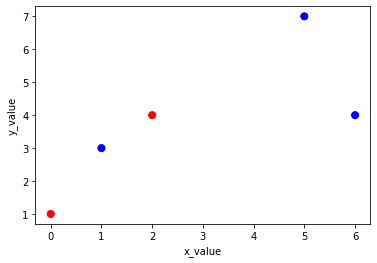

In [123]:
data.plot.scatter(x='x_value', y='y_value', c='color', s=50)

Tip grafikona za iscrtavanje može se zadati i eksplicitno parametrom `kind`.

<AxesSubplot:xlabel='x_value', ylabel='y_value'>

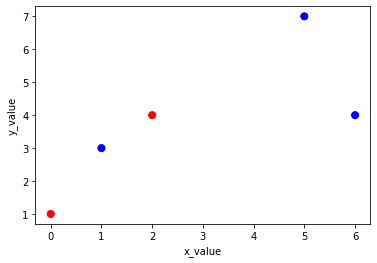

In [119]:
#II nacin
data.plot(kind='scatter', x='x_value', y='y_value', c='color', s=50)

Prikažimo sada odnos tačaka sa različitim bojama.

In [124]:
# I nacin
data.groupby('color').count()

,x_value,y_value,"d(_, (0, 0))"
color,,,
blue,3,3,3
red,2,2,2


In [126]:
# II nacin
data['color'].value_counts()

blue    3
red     2
Name: color, dtype: int64

**NAPOMENA**: Metod <code>value_counts()</code> broji koliko puta se svaka od razlicitih vrednosti pojavljuje u DataFrame ili Series objektu, stoga je veoma zgodan za izracunavanje raspodele kategorickih atributa! Intenzivno se koristi prilikom iscrtavanja grafikona za vizuelizaciju raspodele kategorickih atributa. 

<AxesSubplot:>

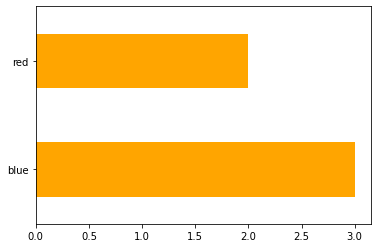

In [142]:
data['color'].value_counts().plot.barh(color='orange')

Odnos broja tačaka je moguće prikazati i grafikonom u obliku pitice.

<AxesSubplot:ylabel='color'>

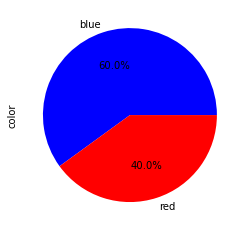

In [128]:
data['color'].value_counts().plot.pie(y='x_value', colors=['blue', 'red'], autopct='%1.1f%%')

<AxesSubplot:ylabel='color'>

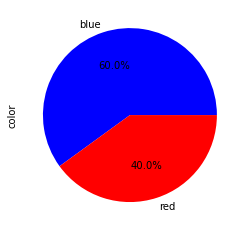

In [129]:
#II nacin
data['color'].value_counts().plot(kind='pie', y='x_value', colors=['blue', 'red'], autopct='%1.1f%%')

Naravno, moguće je kombinovati iscrtavanja koja nudi biblioteka `matplotlib` i sadržaje Pandas struktura. Sledeći primer to ilustruje.

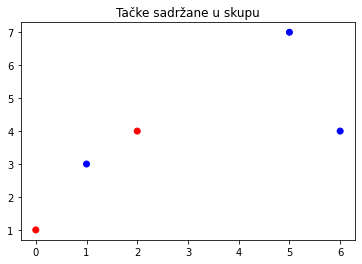

In [140]:
plt.scatter(data['x_value'], data['y_value'], color=data['color'])
plt.title('Tačke sadržane u skupu')
plt.show()